In [75]:
"""

https://mrl.nyu.edu/~perlin/noise/


public final class ImprovedNoise {
   static public double noise(double x, double y, double z) {
      int X = (int)Math.floor(x) & 255,                  // FIND UNIT CUBE THAT
          Y = (int)Math.floor(y) & 255,                  // CONTAINS POINT.
          Z = (int)Math.floor(z) & 255;
      x -= Math.floor(x);                                // FIND RELATIVE X,Y,Z
      y -= Math.floor(y);                                // OF POINT IN CUBE.
      z -= Math.floor(z);
      double u = fade(x),                                // COMPUTE FADE CURVES
             v = fade(y),                                // FOR EACH OF X,Y,Z.
             w = fade(z);
      int A = p[X  ]+Y, AA = p[A]+Z, AB = p[A+1]+Z,      // HASH COORDINATES OF
          B = p[X+1]+Y, BA = p[B]+Z, BB = p[B+1]+Z;      // THE 8 CUBE CORNERS,

      return lerp(w, lerp(v, lerp(u, grad(p[AA  ], x  , y  , z   ),  // AND ADD
                                     grad(p[BA  ], x-1, y  , z   )), // BLENDED
                             lerp(u, grad(p[AB  ], x  , y-1, z   ),  // RESULTS
                                     grad(p[BB  ], x-1, y-1, z   ))),// FROM  8
                     lerp(v, lerp(u, grad(p[AA+1], x  , y  , z-1 ),  // CORNERS
                                     grad(p[BA+1], x-1, y  , z-1 )), // OF CUBE
                             lerp(u, grad(p[AB+1], x  , y-1, z-1 ),
                                     grad(p[BB+1], x-1, y-1, z-1 ))));
   }
   static double fade(double t) { return t * t * t * (t * (t * 6 - 15) + 10); }
   static double lerp(double t, double a, double b) { return a + t * (b - a); }
   static double grad(int hash, double x, double y, double z) {
      int h = hash & 15;                      // CONVERT LO 4 BITS OF HASH CODE
      double u = h<8 ? x : y,                 // INTO 12 GRADIENT DIRECTIONS.
             v = h<4 ? y : h==12||h==14 ? x : z;
      return ((h&1) == 0 ? u : -u) + ((h&2) == 0 ? v : -v);
   }
   static final int p[] = new int[512], permutation[] = { 151,160,137,91,90,15,
   131,13,201,95,96,53,194,233,7,225,140,36,103,30,69,142,8,99,37,240,21,10,23,
   190, 6,148,247,120,234,75,0,26,197,62,94,252,219,203,117,35,11,32,57,177,33,
   88,237,149,56,87,174,20,125,136,171,168, 68,175,74,165,71,134,139,48,27,166,
   77,146,158,231,83,111,229,122,60,211,133,230,220,105,92,41,55,46,245,40,244,
   102,143,54, 65,25,63,161, 1,216,80,73,209,76,132,187,208, 89,18,169,200,196,
   135,130,116,188,159,86,164,100,109,198,173,186, 3,64,52,217,226,250,124,123,
   5,202,38,147,118,126,255,82,85,212,207,206,59,227,47,16,58,17,182,189,28,42,
   223,183,170,213,119,248,152, 2,44,154,163, 70,221,153,101,155,167, 43,172,9,
   129,22,39,253, 19,98,108,110,79,113,224,232,178,185, 112,104,218,246,97,228,
   251,34,242,193,238,210,144,12,191,179,162,241, 81,51,145,235,249,14,239,107,
   49,192,214, 31,181,199,106,157,184, 84,204,176,115,121,50,45,127, 4,150,254,
   138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,215,61,156,180
   };
   static { for (int i=0; i < 256 ; i++) p[256+i] = p[i] = permutation[i]; }
}
"""



import numpy as np

class ImprovedNoise(object):
    def __init__(self):
        self.p = np.array(np.zeros(512), dtype=np.uint8)

        permutation = np.array([ 151,160,137,91,90,15,\
           131,13,201,95,96,53,194,233,7,225,140,36,103,30,69,142,8,99,37,240,21,10,23,\
           190, 6,148,247,120,234,75,0,26,197,62,94,252,219,203,117,35,11,32,57,177,33,\
           88,237,149,56,87,174,20,125,136,171,168, 68,175,74,165,71,134,139,48,27,166,\
           77,146,158,231,83,111,229,122,60,211,133,230,220,105,92,41,55,46,245,40,244,\
           102,143,54, 65,25,63,161, 1,216,80,73,209,76,132,187,208, 89,18,169,200,196,\
           135,130,116,188,159,86,164,100,109,198,173,186, 3,64,52,217,226,250,124,123,\
           5,202,38,147,118,126,255,82,85,212,207,206,59,227,47,16,58,17,182,189,28,42,\
           223,183,170,213,119,248,152, 2,44,154,163, 70,221,153,101,155,167, 43,172,9,\
           129,22,39,253, 19,98,108,110,79,113,224,232,178,185, 112,104,218,246,97,228,\
           251,34,242,193,238,210,144,12,191,179,162,241, 81,51,145,235,249,14,239,107,\
           49,192,214, 31,181,199,106,157,184, 84,204,176,115,121,50,45,127, 4,150,254,\
           138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,215,61,156,180 ], dtype=np.uint8)

        for i in range(256):
            self.p[256+i] = permutation[i]
            self.p[i] = permutation[i]

    #static double fade(double t) { return t * t * t * (t * (t * 6 - 15) + 10); }
    def fade(self, t):
        return t * t * t * (t * (t * 6 - 15) + 10)

    #static double lerp(double t, double a, double b) { return a + t * (b - a); }
    def lerp(self, t, a, b):
        return a + t * (b - a)

    #static double grad(int hash, double x, double y, double z) {
    #  int h = hash & 15;                      // CONVERT LO 4 BITS OF HASH CODE
    #  double u = h<8 ? x : y,                 // INTO 12 GRADIENT DIRECTIONS.
    #         v = h<4 ? y : h==12||h==14 ? x : z;
    #  return ((h&1) == 0 ? u : -u) + ((h&2) == 0 ? v : -v);
    #}
    def grad(self, hash_, x, y, z):
        h = hash_ & 15
        if h < 8:
            u = x
        else:
            u = y
        if h&1 != 0:
            u = -u

        if h < 4:
            v = y
        elif h == 12 or h == 14:
            v = x
        else:
            v = z

        if h&2 != 0:
            v = -v

        return u + v

    """
    static public double noise(double x, double y, double z) {
      int X = (int)Math.floor(x) & 255,                  // FIND UNIT CUBE THAT
          Y = (int)Math.floor(y) & 255,                  // CONTAINS POINT.
          Z = (int)Math.floor(z) & 255;
      x -= Math.floor(x);                                // FIND RELATIVE X,Y,Z
      y -= Math.floor(y);                                // OF POINT IN CUBE.
      z -= Math.floor(z);
      double u = fade(x),                                // COMPUTE FADE CURVES
             v = fade(y),                                // FOR EACH OF X,Y,Z.
             w = fade(z);
      int A = p[X  ]+Y, AA = p[A]+Z, AB = p[A+1]+Z,      // HASH COORDINATES OF
          B = p[X+1]+Y, BA = p[B]+Z, BB = p[B+1]+Z;      // THE 8 CUBE CORNERS,

      return lerp(w, lerp(v, lerp(u, grad(p[AA  ], x  , y  , z   ),  // AND ADD
                                     grad(p[BA  ], x-1, y  , z   )), // BLENDED
                             lerp(u, grad(p[AB  ], x  , y-1, z   ),  // RESULTS
                                     grad(p[BB  ], x-1, y-1, z   ))),// FROM  8
                     lerp(v, lerp(u, grad(p[AA+1], x  , y  , z-1 ),  // CORNERS
                                     grad(p[BA+1], x-1, y  , z-1 )), // OF CUBE
                             lerp(u, grad(p[AB+1], x  , y-1, z-1 ),
                                     grad(p[BB+1], x-1, y-1, z-1 ))));
    }
    """
    def noise(self, point):
        _point = point.astype(int)
        X, Y, Z = _point[0] & 255, _point[1] & 255, _point[2] & 255

        x = point[0] - _point[0]
        y = point[1] - _point[1]
        z = point[2] - _point[2]

        u = self.fade(x)
        v = self.fade(y)
        w = self.fade(z)

        A = self.p[X] + Y
        AA = self.p[A] + Z
        AB = self.p[A+1] + Z
        B = self.p[X+1] + Y
        BA = self.p[B] + Z
        BB = self.p[B+1] + Z

        return self.lerp(w, self.lerp(v, self.lerp(u, self.grad(self.p[AA], x, y, z),\
                                    self.grad(self.p[BA], x-1, y, z )),\
                            self.lerp(u, self.grad(self.p[AB], x, y-1, z),\
                                 self.grad(self.p[BB], x-1, y-1, z))),\
                    self.lerp(v, self.lerp(u, self.grad(self.p[AA+1], x, y, z-1),\
                                 self.grad(self.p[BA+1], x-1, y, z-1)),\
                         self.lerp(u, self.grad(self.p[AB+1], x, y-1, z-1),\
                              self.grad(self.p[BB+1], x-1, y-1, z-1))))

    """
    from: http://flafla2.github.io/2014/08/09/perlinnoise.html

    public double OctavePerlin(double x, double y, double z, int octaves, double persistence) {
        double total = 0;
        double frequency = 1;
        double amplitude = 1;
        double maxValue = 0;  // Used for normalizing result to 0.0 - 1.0
        for(int i=0;i<octaves;i++) {
            total += perlin(x * frequency, y * frequency, z * frequency) * amplitude;

            maxValue += amplitude;

            amplitude *= persistence;
            frequency *= 2;
        }

        return total/maxValue;
    }
    """
    def octave_noise(self, pt, octaves, persistence):
        state = np.array([0,1,1,0], dtype=np.float64)
        for i in range(octaves):
            state[0] += self.noise(point(pt[0] * state[1], pt[1] * state[1], pt[2] * state[1])) * state[2]
            state[3] += state[2]
            state[2] *= persistence
            state[1] *= 2

        return state[0] / state[3]

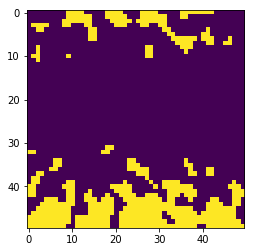

In [41]:
import noise
import numpy as np

scale_factor = 0.5

import matplotlib.pyplot as plt

w = 50
h = 50
incr = 1
octaves = 1
freq = .1 * octaves

color1 = 0.0
color2 = 1.0

im0 = np.array(np.zeros((w,h)), dtype=np.float64)
im1 = np.array(np.zeros((w,h)), dtype=np.float64)
im2 = np.array(np.zeros((w,h)), dtype=np.float64)
im3 = np.array(np.zeros((w,h)), dtype=np.float64)

xs = np.linspace(0.0, 6.0, num=256)
ys = np.linspace(0.0, 6.0, num=256)

for x in range(w):
    for y in range(h):
        z = 0.0
        new_x = xs[x] + noise.pnoise3(xs[x] / freq, ys[y] / freq, z / freq, octaves) * scale_factor
        z += incr
        new_y = ys[y] + noise.pnoise3(xs[x] / freq, ys[y] / freq, z / freq, octaves) * scale_factor
        z += incr
        new_z = z + noise.pnoise3(xs[x] / freq, ys[y] / freq, z / freq, octaves) * scale_factor
        im0[x,y] = new_x
        im1[x,y] = new_y
        im2[x,y] = new_z

        if np.floor(new_x) % 2 == 0:
            color = color1
        else:
            color = color2

        im3[x,y] = color

plt.imshow(im3)

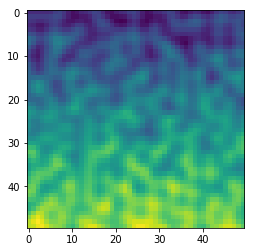

In [42]:
plt.imshow(im0)

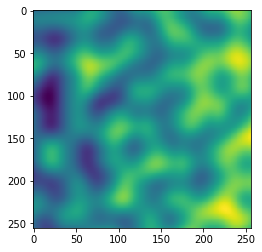

In [185]:
plt.imshow(im1)

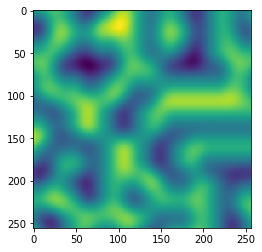

In [186]:
plt.imshow(im2)

In [187]:
print(im0)

[[0.00000000e+00 1.22754340e-03 9.24310589e-03 ... 9.24110413e-03
  1.22487545e-03 0.00000000e+00]
 [2.58793955e-01 2.60051073e-01 2.68096191e-01 ... 2.67748119e-01
  2.59960176e-01 2.58793955e-01]
 [5.17190608e-01 5.18646340e-01 5.26889737e-01 ... 5.25519612e-01
  5.18128636e-01 5.17190608e-01]
 ...
 [6.42307542e+00 6.18815016e+00 5.95295238e+00 ... 6.44153118e+00
  6.19866967e+00 5.96218228e+00]
 [6.21173636e+00 5.97647186e+00 5.74126733e+00 ... 6.45706761e+00
  6.21418583e+00 5.97769546e+00]
 [6.00000000e+00 5.76473546e+00 5.52986822e+00 ... 6.47937572e+00
  6.23649096e+00 6.00000000e+00]]


In [120]:
help(noise)

Help on package noise:

NAME
    noise - Noise functions for procedural generation of content

DESCRIPTION
    Contains native code implementations of Perlin improved noise (with
    fBm capabilities) and Perlin simplex noise. Also contains a fast
    "fake noise" implementation in GLSL for execution in shaders.
    
    Copyright (c) 2008, Casey Duncan (casey dot duncan at gmail dot com)

PACKAGE CONTENTS
    _perlin
    _simplex
    perlin
    setup
    shader
    shader_noise
    test

FUNCTIONS
    pnoise1 = noise1(...)
        noise1(x, octaves=1, persistence=0.5, lacunarity=2.0, repeat=1024, base=0.0)
        
        1 dimensional perlin improved noise function (see noise3 for more info)
    
    pnoise2 = noise2(...)
        noise2(x, y, octaves=1, persistence=0.5, lacunarity=2.0, repeatx=1024, repeaty=1024, base=0.0)
        
        2 dimensional perlin improved noise function (see noise3 for more info)
    
    pnoise3 = noise3(...)
        noise3(x, y, z, octaves=1, persist